<a href="https://colab.research.google.com/github/Panchol211/Core_Week_2_ip/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2020_08_Panchol_Alier_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Defining the Question**
Specifying the data analysis question

Want to understand what are the fators which contribute to someone opening Bank Acount and which individual are like to own bank account.

# 2. **Defining Metric for Success**
The objective will have been met we have identified the following:

Is level of education factor in Bank Account opening 
Marital statuse has any correlation to one owning a bank account
Does type of you has enfluence on having a Bank account



# 3. **Understanding the context**
The East Africa Countries of {Rwanda, Kenya, Tanzania, and Uganda } what to know the country state of financial inculsion and the key demographic factors that might drive individuals’ financial outcomes

# 4. **Recording the experimental design**
Load datasets
Check for missing data
Check for duplicates

# *Data Analysis*

In [ ]:
# Importing libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Load dataset for analysis 
fin_dataset = pd.read_csv("Financial Dataset.csv")
#previewing the data 
fin_dataset.head(10)


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [ ]:
#previewing the data 
fin_dataset.tail(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,NaN,24.0,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,NaN,35.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#checking how the data is structureed, there are 23524 rows and 13 columns 
fin_dataset.shape

(23524, 13)

In [ ]:
# Checking whether each column has an appropriate datatype
fin_dataset.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

Numeric Features Description

In [ ]:
fin_dataset.describe()


,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [ ]:
fin_dataset.info

<bound method DataFrame.info of       country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...         

In [ ]:
#checking for missing values if any 
fin_dataset.isnull().values.any()

True

In [ ]:
# Check for missing values, we see that different columns has different missing valuse 
fin_dataset.isnull().sum().sort_values(ascending=False)

Has a Bank account        36
gender_of_respondent      34
Respondent Age            34
marital_status            32
Type of Job               30
Level of Educuation       29
household_size            28
Type of Location          15
country                   14
Cell Phone Access         11
The relathip with head     4
uniqueid                   0
year                       0
dtype: int64

In [ ]:
#Checking for duplicates values in the dataset, there are not duplicates in this dataset
fin_dataset.duplicated().value_counts()

False    23524
dtype: int64

In [ ]:
#dropping the null values 
fin_dataset_clean = fin_dataset.dropna()
fin_dataset_clean.head(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [ ]:
# No more missing values/ null values 
fin_dataset_clean.isnull().sum().sort_values(ascending=False)

Type of Job               0
Level of Educuation       0
marital_status            0
The relathip with head    0
gender_of_respondent      0
Respondent Age            0
household_size            0
Cell Phone Access         0
Type of Location          0
Has a Bank account        0
uniqueid                  0
year                      0
country                   0
dtype: int64

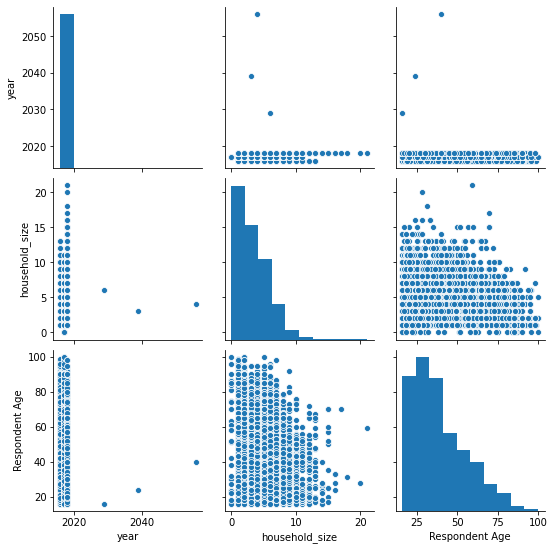

In [ ]:
#plot to overview the dataset 
sns.pairplot(fin_dataset_clean)
plt.show()

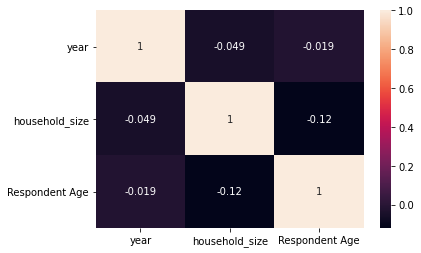

In [ ]:
#There is correlation 
sns.heatmap(fin_dataset_clean.corr(),annot=True)
plt.show()

In [ ]:
# checking the country with highest number of respondances
fin_dataset_clean['country'].value_counts()

Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: country, dtype: int64

In [ ]:
#checking how many males vs femals took part in the survey 
fin_dataset_clean['gender_of_respondent'].value_counts()

Female    13767
Male       9576
Name: gender_of_respondent, dtype: int64

In [ ]:
#Cell Phone Access, majority of the respondance has accessibility to cell phones, which is 74.3 % of the respondance has cell phones 
fin_dataset_clean['Cell Phone Access'].value_counts()


Yes    17334
No      6009
Name: Cell Phone Access, dtype: int64

In [ ]:
# what is the highest educational level that the respondance has, majority have primary certificates. 
fin_dataset_clean['Level of Educuation'].value_counts()

Primary education                  12689
No formal education                 4467
Secondary education                 4207
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: Level of Educuation, dtype: int64

In [ ]:
# where are most repondance working, most of the repondance are self employed 
fin_dataset_clean['Type of Job'].value_counts()

Self employed                   6361
Informally employed             5550
Farming and Fishing             5422
Remittance Dependent            2509
Other Income                    1077
Formally employed Private       1048
No Income                        618
Formally employed Government     386
Government Dependent             247
Dont Know/Refuse to answer       125
Name: Type of Job, dtype: int64

In [ ]:
#where are most respondances residing 
fin_dataset_clean['Type of Location'].value_counts()

Rural    14264
Urban     9079
Name: Type of Location, dtype: int64

In [ ]:
#number of respondance having bank accounts, which is only 14.12% of the respondants 
fin_dataset_clean['Has a Bank account'].value_counts()





No     20046
Yes     3297
Name: Has a Bank account, dtype: int64

In [ ]:
#most the reponders are people married or living together 
fin_dataset_clean['marital_status'].value_counts()

Married/Living together    10700
Single/Never Married        7903
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, dtype: int64

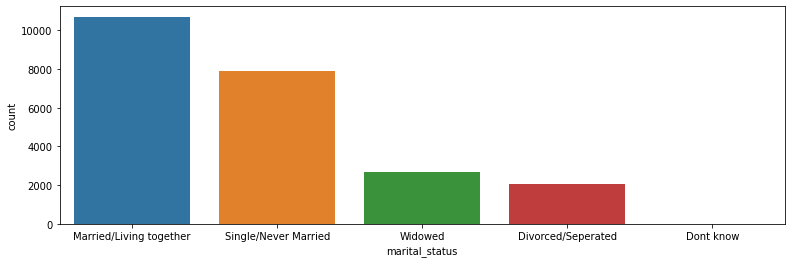

In [ ]:
plt.figure(figsize=(13, 4))
sns.countplot(fin_dataset_clean.marital_status.dropna(), order = fin_dataset_clean.marital_status.value_counts().index);

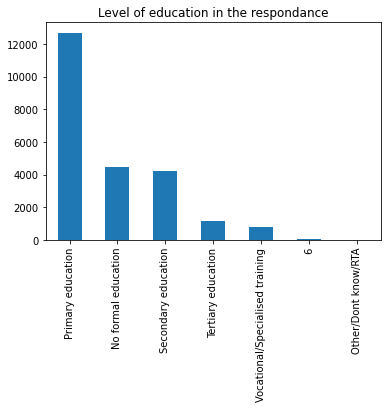

In [ ]:
fin_dataset_clean["Level of Educuation"].value_counts().plot.bar(title="Level of education in the respondance")
plt.show()

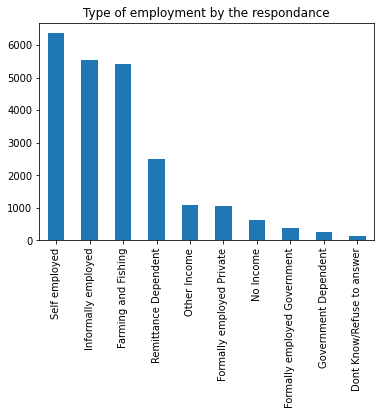

In [ ]:
fin_dataset_clean["Type of Job"].value_counts().plot.bar(title="Type of employment by the respondance")
plt.show()

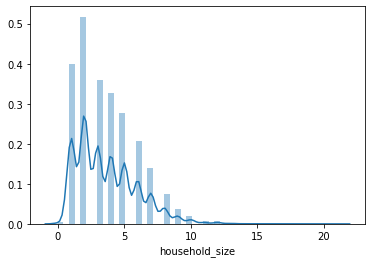

In [ ]:
sns.distplot(fin_dataset_clean.household_size.dropna());

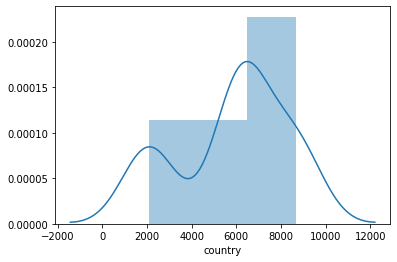

In [ ]:
sns.distplot(fin_dataset_clean.country.value_counts().dropna());

Multivariate Analysis

**Factor Analysis**

In Bartlett ’s test, the p-value is 0 which 1.7639790569230074e-46. The test was statistically significant, 
indicating that the observed correlation matrix is not an identity matrix

In [ ]:
import pandas as pd
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(fin_dataset_clean)
chi_square_value, p_value

(407.45564519995196, 1.7639790569230074e-46)

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis
KMO values range between 0 and 1. 
Value of KMO less than 0.6 is considered inadequate.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(fin_dataset_clean)

In [ ]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(fin_dataset_clean, 3, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.123611
1,1.013197
2,0.863192


In [ ]:
fa = FactorAnalyzer()
fa.analyze(fin_dataset_clean, 3, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3
year,0.005174,0.266198,0.0
household_size,-0.360465,-0.176687,0.0
Respondent Age,0.370713,-0.078801,0.0


In [ ]:
fa = FactorAnalyzer()
fa.analyze(fin_dataset_clean, 3, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3
year,0.005174,0.266198,0.0
household_size,-0.360465,-0.176687,0.0
Respondent Age,0.370713,-0.078801,0.0


In [ ]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,0.26739,0.108290,0.000000
Proportion Var,0.08913,0.036097,0.000000
Cumulative Var,0.08913,0.125226,0.125226


**Discriminant Analysis**

Using only the nureical dataset 

In [ ]:
drop = ["country","uniqueid","Has a Bank account",	"Type of Location",	"Cell Phone Access","gender_of_respondent",	"The relathip with head",	"marital_status",	"Level of Educuation","Type of Job"]
fin_dataset_clean.drop(drop, axis=1, inplace=True)

In [106]:
fin_dataset_clean.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Code,country1
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,0,0
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2,0
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,0,0
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,2,0


**Principal Component Analysis** 

Trying to Conevert categorical to numerical data

In [87]:
fin_dataset_clean["Code"]= pd.factorize(fin_dataset_clean.marital_status)[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
fin_dataset_clean.marital_status.value_counts()

Married/Living together    10700
Single/Never Married        7903
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, dtype: int64

In [89]:
fin_dataset_clean.Code.value_counts()

0    10700
2     7903
1     2683
3     2049
4        8
Name: Code, dtype: int64

In [91]:
fin_dataset_clean.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Code
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,0
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,0
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,2


In [96]:
fin_dataset_clean["country1"]= pd.factorize(fin_dataset_clean.country)[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
fin_dataset_clean.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Code,country1
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,0,0
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2,0
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,0,0
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,2,0


In [93]:
X = fin_dataset_clean.drop('Code', 1)
y = fin_dataset_clean['Code']

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

Iam trying to implement PCA but i have diffculties. Am try to implement using a different method 


In [119]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 
for i in fin_dataset_clean.columns :
  data_encoded[i]=label.fit_transform(fin_dataset_clean[i])
data_encoded.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Code,country1
0,0,2,0,1,0,1,3,8,0,5,2,4,9,0,0
1,0,2,1111,0,0,0,5,54,0,1,4,1,4,1,0
2,0,2,2222,1,1,1,5,10,1,3,3,6,9,2,0
3,0,2,3333,0,0,1,5,18,0,1,2,3,3,0,0
4,0,2,4444,0,1,0,8,10,1,0,3,3,5,2,0


In [122]:
X = fin_dataset_clean["household_size"]
y = fin_dataset_clean["marital_status"]

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X.values.reshape(1,-1)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Base on the univarite and bivariate analysis.**


The following can be observed from the respondance

1- Majority of the respondence were from Rwanda 

2-Most of the people who did the survey were female and married couples/staying together 

3- 85.88% don't have a bank account

4- Majorinty lives in Rural setting and  most have cell phones 

5- The most highest level of education was primary school

6- Majority of the respondence are self-employed



**The following factors most have contributed to lack accessibility to the bank**


1- Majority lives in Rural areas and banks are in Urbans areas there for its diffcult for them to have bank accounts 

2- They have cell-phones and sinces mobile money is the effective in East Africa the respondence opted to use mobile phone (mpesa)instead of Banks 

3- Majority are primary school leavers they haven't been expose to how banks works and its importance


** Some recomendation **


Aware should be done to the people rural areas to educate them of the importance of banks e.g credit worthnes which results to loan, intrest, saving 

Banks baraches should be open in rural area to enable locals to get access to Banks 
